In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [9]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

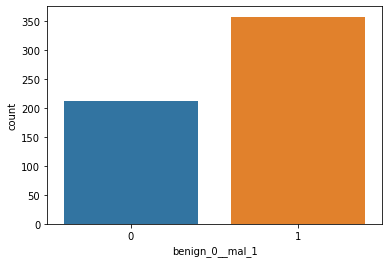

In [12]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

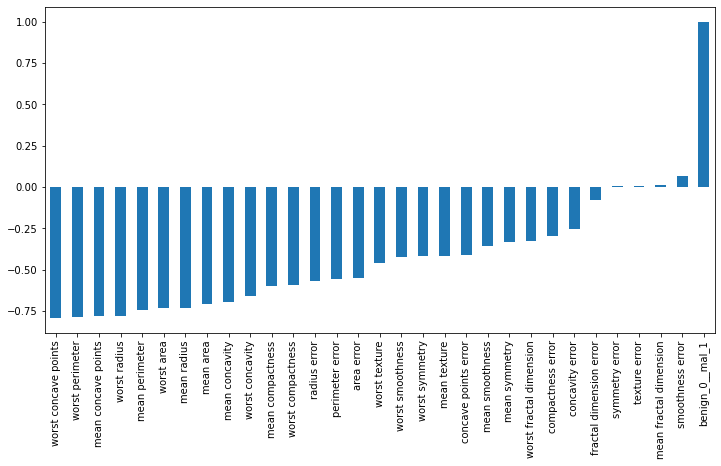

In [15]:
plt.figure(figsize=(12,6))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

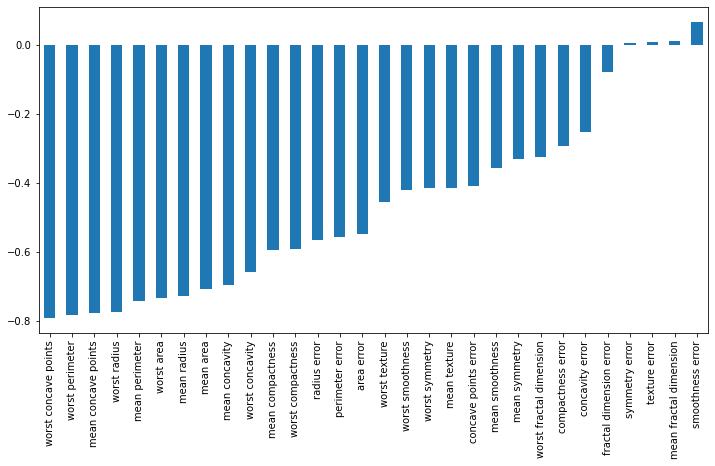

In [16]:
plt.figure(figsize=(12,6))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

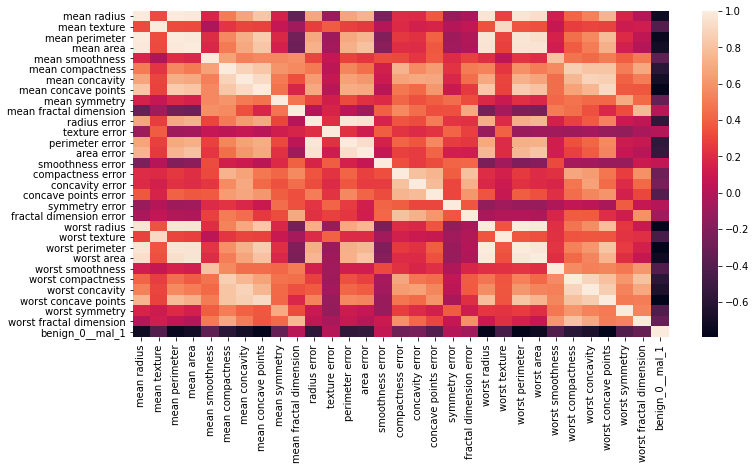

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [20]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [27]:
X_train.shape

(398, 30)

In [28]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [29]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 1s 26ms/step - loss: 0.7253 - val_loss: 0.6865
Epoch 2/600
13/13 [==============================] - 0s 24ms/step - loss: 0.6657 - val_loss: 0.6400
Epoch 3/600
13/13 [==============================] - 0s 14ms/step - loss: 0.6163 - val_loss: 0.5984
Epoch 4/600
13/13 [==============================] - 0s 17ms/step - loss: 0.5732 - val_loss: 0.5590
Epoch 5/600
13/13 [==============================] - 0s 17ms/step - loss: 0.5308 - val_loss: 0.5116
Epoch 6/600
13/13 [==============================] - 0s 15ms/step - loss: 0.4825 - val_loss: 0.4639
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.4373 - val_loss: 0.4204
Epoch 8/600
13/13 [==============================] - 0s 8ms/step - loss: 0.3956 - val_loss: 0.3807
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3576 - val_loss: 0.3459
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3214 - val_loss: 0.3139
Epo

Epoch 83/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0475 - val_loss: 0.1296
Epoch 84/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0481 - val_loss: 0.1285
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0501 - val_loss: 0.1289
Epoch 86/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0433 - val_loss: 0.1286
Epoch 87/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0442 - val_loss: 0.1286
Epoch 88/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0443 - val_loss: 0.1286
Epoch 89/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0467 - val_loss: 0.1327
Epoch 90/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0464 - val_loss: 0.1294
Epoch 91/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0429 - val_loss: 0.1323
Epoch 92/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0434 - val_loss: 0.1295


13/13 [==============================] - 0s 4ms/step - loss: 0.0348 - val_loss: 0.1411
Epoch 165/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0347 - val_loss: 0.1422
Epoch 166/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0380 - val_loss: 0.1413
Epoch 167/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0360 - val_loss: 0.1458
Epoch 168/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.1412
Epoch 169/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0350 - val_loss: 0.1433
Epoch 170/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0348 - val_loss: 0.1411
Epoch 171/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.1434
Epoch 172/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.1398
Epoch 173/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0338 - val_loss: 0.1420
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0300 - val_loss: 0.1501
Epoch 246/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0302 - val_loss: 0.1502
Epoch 247/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0346 - val_loss: 0.1494
Epoch 248/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.1525
Epoch 249/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0316 - val_loss: 0.1496
Epoch 250/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.1495
Epoch 251/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0342 - val_loss: 0.1519
Epoch 252/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0303 - val_loss: 0.1490
Epoch 253/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0304 - val_loss: 0.1516
Epoch 254/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0331 - val_loss: 0.1513
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0332 - val_loss: 0.1612
Epoch 327/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0292 - val_loss: 0.1612
Epoch 328/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.1644
Epoch 329/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.1627
Epoch 330/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.1632
Epoch 331/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0284 - val_loss: 0.1646
Epoch 332/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.1639
Epoch 333/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0299 - val_loss: 0.1672
Epoch 334/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.1647
Epoch 335/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.1641
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0269 - val_loss: 0.1813
Epoch 408/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0254 - val_loss: 0.1828
Epoch 409/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.1871
Epoch 410/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.1844
Epoch 411/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.1855
Epoch 412/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0248 - val_loss: 0.1858
Epoch 413/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.1851
Epoch 414/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.1855
Epoch 415/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.1861
Epoch 416/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0235 - val_loss: 0.1867
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0226 - val_loss: 0.2065
Epoch 489/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.2040
Epoch 490/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.2073
Epoch 491/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0220 - val_loss: 0.2058
Epoch 492/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.2063
Epoch 493/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0230 - val_loss: 0.2087
Epoch 494/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.2089
Epoch 495/600
13/13 [==============================] - ETA: 0s - loss: 0.005 - 0s 3ms/step - loss: 0.0227 - val_loss: 0.2103
Epoch 496/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.2101
Epoch 497/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0229

13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - val_loss: 0.2400
Epoch 570/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0203 - val_loss: 0.2406
Epoch 571/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.2413
Epoch 572/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.2410
Epoch 573/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.2412
Epoch 574/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.2394
Epoch 575/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0190 - val_loss: 0.2415
Epoch 576/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 0.2421
Epoch 577/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.2416
Epoch 578/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.2419
Epoc

In [30]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

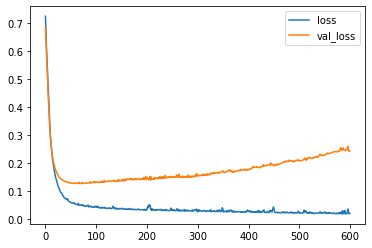

In [31]:
losses.plot()

In [32]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
#help(EarlyStopping)

In [35]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [37]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop]
         )

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6844 - val_loss: 0.6770
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6657 - val_loss: 0.6609
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6481 - val_loss: 0.6433
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6259 - val_loss: 0.6209
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5996 - val_loss: 0.5909
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5576 - val_loss: 0.5354
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4926 - val_loss: 0.4736
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4286 - val_loss: 0.4136
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3730 - val_loss: 0.3631
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3283 - val_loss: 0.3223
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.1230
Epoch 84/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.1215
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0378 - val_loss: 0.1219
Epoch 00085: early stopping


<AxesSubplot:>

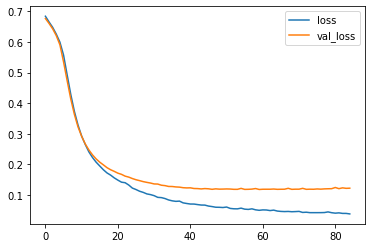

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [39]:
from tensorflow.keras.layers import Dropout

In [40]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [41]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop]
         )

Epoch 1/600
13/13 [==============================] - 1s 11ms/step - loss: 0.7382 - val_loss: 0.6812
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.7038 - val_loss: 0.6598
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6873 - val_loss: 0.6408
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6432 - val_loss: 0.6207
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6420 - val_loss: 0.6000
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6133 - val_loss: 0.5779
Epoch 7/600
13/13 [==============================] - 0s 8ms/step - loss: 0.6009 - val_loss: 0.5531
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5811 - val_loss: 0.5267
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5471 - val_loss: 0.5016
Epoch 10/600
13/13 [==============================] - 0s 9ms/step - loss: 0.5285 - val_loss: 0.4730
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.1148 - val_loss: 0.1214
Epoch 84/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1021 - val_loss: 0.1200
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0983 - val_loss: 0.1263
Epoch 86/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0947 - val_loss: 0.1232
Epoch 87/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0946 - val_loss: 0.1190
Epoch 88/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0996 - val_loss: 0.1217
Epoch 89/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1155 - val_loss: 0.1251
Epoch 90/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0966 - val_loss: 0.1222
Epoch 91/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0998 - val_loss: 0.1207
Epoch 92/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1034 - val_loss: 0.1216
Epoch 93/600


<AxesSubplot:>

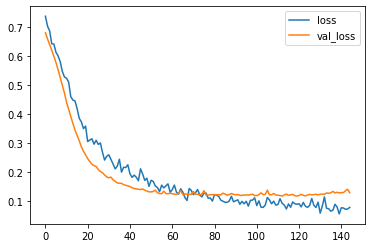

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [65]:
#predictions = model.predict_classes(X_test)
predictions  = (model.predict(X_test) > 0.5).astype("int32")

In [66]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [68]:
print(confusion_matrix(y_test,predictions))

[[ 63   3]
 [  2 103]]
